In [1]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import torch
from vit_pytorch import ViT
from torchvision.transforms import v2
from dataloader import training_dataset, testing_dataset
from diffusers import AutoencoderKL
from torch.utils.data import Dataset, DataLoader

In [3]:
torch.cuda.is_available()

True

In [12]:
url = "https://huggingface.co/stabilityai/sd-vae-ft-mse-original/blob/main/vae-ft-mse-840000-ema-pruned.safetensors"  # can also be a local file
vae = AutoencoderKL.from_single_file(url, cache_dir='/models/vae').to('cuda')

In [29]:
dataset = DataLoader(training_dataset, shuffle=True)

In [57]:
sample = next(iter(dataset))
sample.shape

torch.Size([1, 3, 384, 256])

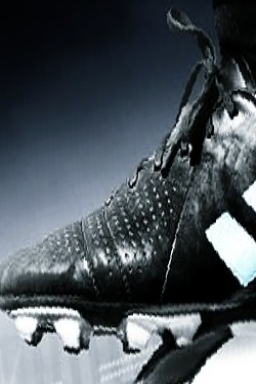

In [58]:
v2.functional.to_pil_image((sample.squeeze(0).cpu() + 1) / 2)

In [59]:
prior = vae.encode(sample)

In [70]:
prior.latent_dist.sample().shape

torch.Size([1, 4, 48, 32])

In [64]:
recon = vae.decode(prior.latent_dist.sample())

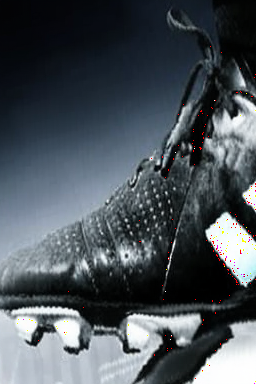

In [69]:
v2.functional.to_pil_image((recon.sample.squeeze(0).cpu() + 1) / 2)